# ESCUELA POLITECNICA NACIONAL
## FACULTAD DE INGENIERIA EN SISTEMAS
## PROYECTO PRIMER BIMESTRE PYTHON
## CAROL LIZETH OÑA HINOSTROZA


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
path_general='Data/'
filename_category='MX_category_id.json'
filename_videos ='MXvideos.csv'
path_category= path_general+filename_category 
path_videos= path_general+filename_videos
df_videos= pd.read_csv(path_videos,encoding='latin1')

In [4]:
try:
    with open(path_category,encoding="latin1") as json_file:  
        categories = json.load(json_file)          
except:
    print("Error cargando categorias")

In [5]:
array_categories=categories['items']

def obtain_category(category_id):
    for category in array_categories:
        if(category['id']==str(category_id)):
            return category['snippet']['title']

df_videos['category']=pd.Series(list(map(obtain_category,list(df_videos['category_id'].values))))

## 1. CATEGORIAS CON MAS VIDEOS

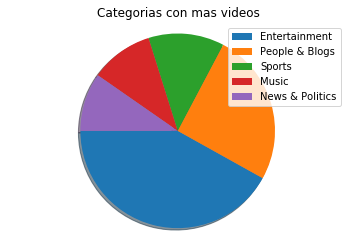

In [6]:
serie_count_videos_categorias=df_videos.category.value_counts().head(5)
patches, text=plt.pie(serie_count_videos_categorias, startangle=180, shadow=True)
plt.legend(patches,serie_count_videos_categorias.index,loc='best')
plt.axis('equal')
plt.title('Categorias con mas videos')
plt.show()

In [7]:
serie_count_videos_categorias

Entertainment      13487
People & Blogs      8159
Sports              4050
Music               3371
News & Politics     3113
Name: category, dtype: int64

## 2. CATEGORIAS MAS VISTAS

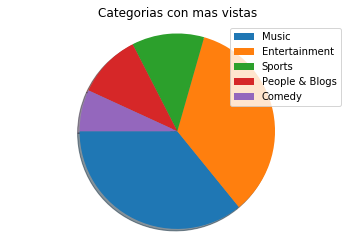

In [8]:
serie_count_vistas_categorias=df_videos.groupby('category').sum()['views'].sort_values(ascending=False).head(5)
patches, text=plt.pie(serie_count_vistas_categorias, startangle=180, shadow=True)
plt.legend(patches,serie_count_vistas_categorias.index,loc='best')
plt.axis('equal')
plt.title('Categorias con mas vistas')
plt.show()

In [9]:
serie_count_vistas_categorias

category
Music             4159713283
Entertainment     4027574336
Sports            1389337978
People & Blogs    1229501908
Comedy             794647488
Name: views, dtype: int64

## 3. CATEGORIAS CON MENOS VISUALIZACIONES

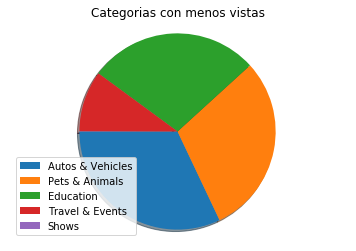

In [10]:
serie_count_menos_vistas_categorias=df_videos.groupby('category').sum()['views'].sort_values(ascending=False).tail(5)
patches, text=plt.pie(serie_count_menos_vistas_categorias, startangle=180, shadow=True)
plt.legend(patches,serie_count_menos_vistas_categorias.index,loc='best')
plt.axis('equal')
plt.title('Categorias con menos vistas')
plt.show()

In [40]:
serie_count_menos_vistas_categorias

category
Autos & Vehicles    49190861
Pets & Animals      45629022
Education           43205309
Travel & Events     15413050
Shows                  65436
Name: views, dtype: int64

## 4. CATEGORIAS CON MAS LIKES

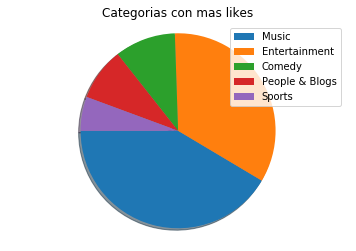

In [11]:
serie_count_likes_categorias=df_videos.groupby('category').sum()['likes'].sort_values(ascending=False).head(5)
patches, text=plt.pie(serie_count_likes_categorias, startangle=180, shadow=True)
plt.legend(patches,serie_count_likes_categorias.index,loc='best')
plt.axis('equal')
plt.title('Categorias con mas likes')
plt.show()

In [43]:
serie_count_likes_categorias

category
Music             227013300
Entertainment     186692595
Comedy             55273506
People & Blogs     47859054
Sports             30866251
Name: likes, dtype: int64

## 5. CATEGORIAS CON MAS DISLIKES

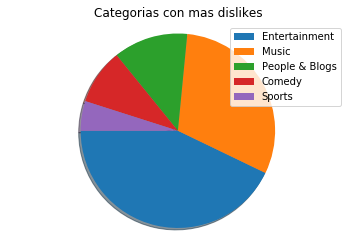

In [12]:
serie_count_mas_dislikes_categorias=df_videos.groupby('category').sum()['dislikes'].sort_values(ascending=False).head(5)
patches, text=plt.pie(serie_count_mas_dislikes_categorias, startangle=180, shadow=True)
plt.legend(patches,serie_count_mas_dislikes_categorias.index,loc='best')
plt.axis('equal')
plt.title('Categorias con mas dislikes')
plt.show()

In [49]:
serie_count_mas_dislikes_categorias

category
Entertainment     11139060
Music              7957335
People & Blogs     3219558
Comedy             2400688
Sports             1279451
Name: dislikes, dtype: int64

## 6. TOP 5 VIDEOS MAS VISTOS

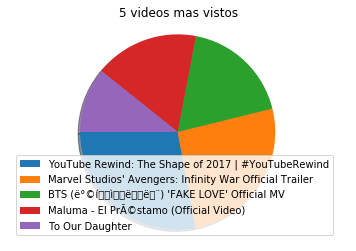

In [16]:
series_count_videos_mas_vistos = df_videos.groupby('title').sum()['views'].sort_values(ascending=False).head(5)
patches, text=plt.pie(series_count_videos_mas_vistos, startangle=180, shadow=True)
plt.legend(patches,series_count_videos_mas_vistos.index,loc='best')
plt.axis('equal')
plt.title('5 videos mas vistos')
plt.show()

In [14]:
series_count_videos_mas_vistos

title
YouTube Rewind: The Shape of 2017 | #YouTubeRewind         254281205
Marvel Studios' Avengers: Infinity War Official Trailer    235533775
BTS (ë°©íìë
ë¨) 'FAKE LOVE' Official MV              164942708
Maluma - El PrÃ©stamo (Official Video)                     157238129
To Our Daughter                                             97555703
Name: views, dtype: int64

## 7. TOP 5 VIDEOS MAS COMENTADOS

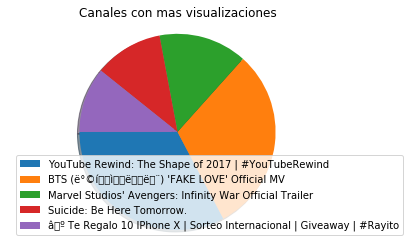

In [22]:
series_count_videos_mas_comentados = df_videos.groupby('title').sum()['comment_count'].sort_values(ascending=False).head(5)
patches, text=plt.pie(series_count_videos_mas_comentados, startangle=180, shadow=True)
plt.legend(patches,series_count_videos_mas_comentados.index,loc='best')
plt.axis('equal')
plt.title('Canales con mas visualizaciones')
plt.show()

In [23]:
series_count_videos_mas_comentados

title
YouTube Rewind: The Shape of 2017 | #YouTubeRewind                       2675452
BTS (ë°©íìë
ë¨) 'FAKE LOVE' Official MV                            2504206
Marvel Studios' Avengers: Infinity War Official Trailer                  1191312
Suicide: Be Here Tomorrow.                                                924681
âº Te Regalo 10 IPhone X | Sorteo Internacional | Giveaway | #Rayito     878009
Name: comment_count, dtype: int64

## 8. CANALES CON MAS VISUALIZACIONES

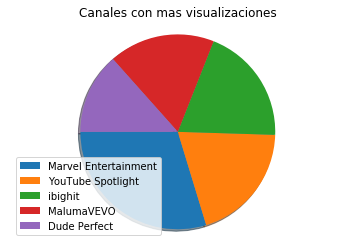

In [26]:
series_count_canales_mas_vistos = df_videos.groupby('channel_title').sum()['views'].sort_values(ascending=False).head(5)
patches, text=plt.pie(series_count_canales_mas_vistos, startangle=180, shadow=True)
plt.legend(patches,series_count_canales_mas_vistos.index,loc='best')
plt.axis('equal')
plt.title('Canales con mas visualizaciones')
plt.show()

In [27]:
series_count_canales_mas_vistos

channel_title
Marvel Entertainment    383058026
YouTube Spotlight       255273304
ibighit                 251466087
MalumaVEVO              226697506
Dude Perfect            172934487
Name: views, dtype: int64

## 9. CANALES CON MAS COMENTARIOS

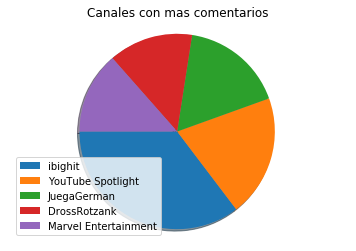

In [24]:
series_count_canales_mas_comentados = df_videos.groupby('channel_title').sum()['comment_count'].sort_values(ascending=False).head(5)
patches, text=plt.pie(series_count_canales_mas_comentados, startangle=180, shadow=True)
plt.legend(patches,series_count_canales_mas_comentados.index,loc='best')
plt.axis('equal')
plt.title('Canales con mas comentarios')
plt.show()

In [25]:
series_count_canales_mas_comentados

channel_title
ibighit                 4793203
YouTube Spotlight       2737473
JuegaGerman             2312453
DrossRotzank            1894451
Marvel Entertainment    1830155
Name: comment_count, dtype: int64